BUAD 5092 Module 3

Jason Street

# Question 1
## Lifeguard Scheduling

Consider the problem of scheduling lifeguards for a revolving 7-day week (Sun-Sat) over the summer. Scheduled lifeguards work for 4 consecutive days, followed by 3 days off. The minimum number of lifeguards required for each day of the week was forecasted using past customer arrival data. The daily requirement for lifeguards is as follows.

\begin{equation*}
\begin{matrix}
& Sun & Mon & Tue & Wed & Thu & Fri & Sat & \\
& 10 & 7 & 5 & 5 & 7 & 7 & 10 & \\
\end{matrix}
\end{equation*}

**Develop a lifeguard schedule that minimizes the number of lifeguards working during the week.**

-Formulate this problem in Jupyter Notebook.\
-Setup and solve this problem in Excel/Solver. Include a screenshot of your Excel model, along with the Solver window, in your Jupyter Notebook (and consequently your PDF report).\
-Setup and solve this problem in Python/Gurobi.\

## Excel Model

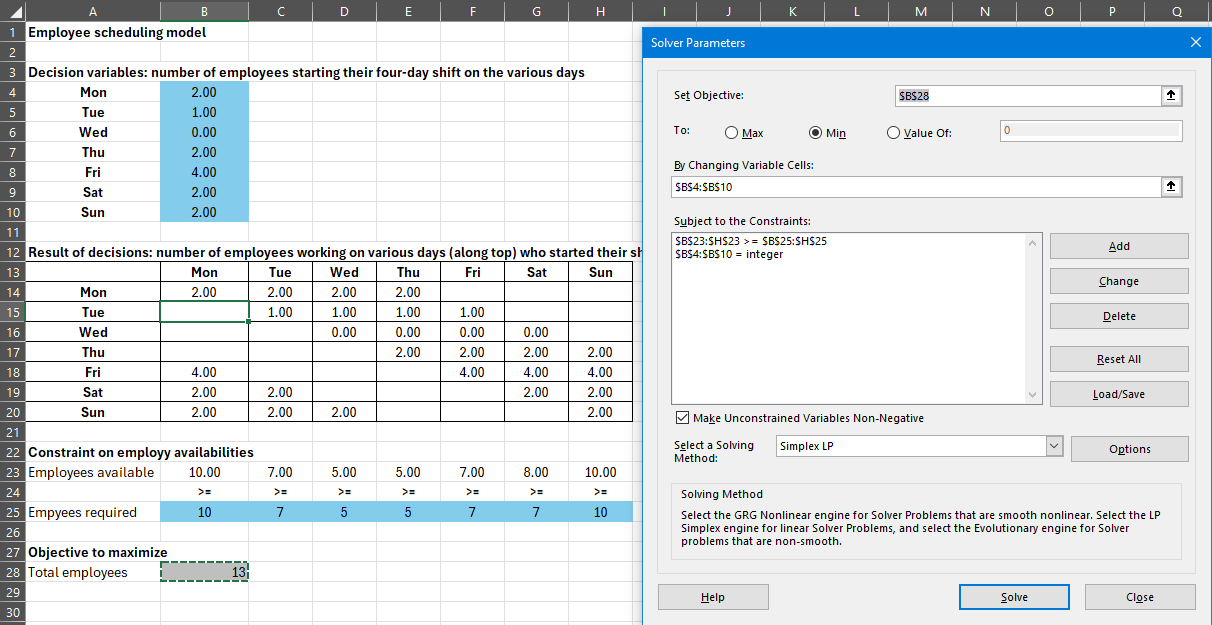

In [1]:
from IPython import display
display.Image("./M3_q1_screenshot.png")

## Python Model

**Sets** \
$D$: set of days \{0=Monday, 1=Tuesday, ..., 6=Sunday\}

**Parameters** \
$r$: vector minimum number of employees required each day ($r_0 = 10$, $r_1 = 7$, ...) \
$A$: workday adjacency matrix \
all employees are scheduled for 4-day work weeks

**Decision Variables** \
$x_i$: number employees that begin their 4-day work week on day $i$

**Objective Function and Constraints** \
The optimization model is formulated as


\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{j \in D}{\sum} x_j &  &  &  \\
\textrm{s.t.} & \underset{j \in D}{\sum}a_{i,j}x_j & \geq & r_i & \forall i \in D \\
& x_j & \geq & 0 & \forall j \in D \\
\end{matrix}
\end{equation*}

In [2]:
from gurobipy import *
m = Model('lifeguard')

# Sets
## Set of days
D = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Parameters
## Minimum number of employees required each day
r = [10,7,5,5,7,7,10]
## Workday adjacency matrix which will is a list of lists
A = [[1,0,0,0,1,1,1],\
    [1,1,0,0,0,1,1],\
    [1,1,1,0,0,0,1],\
    [1,1,1,1,0,0,0],\
    [0,1,1,1,1,0,0],\
    [0,0,1,1,1,1,0],\
    [0,0,0,1,1,1,1]]

# Decision Variables
## Number ads per show
x = [m.addVar(name=D[j], lb=0, vtype=GRB.INTEGER) for j in range(len(D))]
m.update()

# Objective Function
## Minimize number of workers
m.setObjective(sum(x), GRB.MINIMIZE)
m.update()

# Constraints
## Number of employees constraint
m.addConstrs(quicksum(A[i][j]*x[j] for j in range(len(D))) >= r[i] for i in range(len(D)))
m.update()

# Solve and Print Solution
m.optimize()
print('\n\n')
for var in m.getVars():
    print('The company should schedule %s workers on %s.' % (round(var.x,2),var.varName))
print('The total number of workers is %s.' % round(m.objval,2))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-07
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 7 columns and 28 nonzeros
Model fingerprint: 0x79f33a99
Variable types: 0 continuous, 7 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Found heuristic solution: objective 15.0000000
Presolve time: 0.00s
Presolved: 7 rows, 7 columns, 28 nonzeros
Variable types: 0 continuous, 7 integer (0 binary)

Root relaxation: objective 1.300000e+01, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent 

# Question 2
## Multiperiod Planning

Consider the problem of planning production of snowboards over a 6-week horizon. The factory’s regular production capacity is 160 snowboards per week at a cost of $190 per snowboard. In addition to regular production time, the factory may use overtime. The factory’s overtime production capacity is 50 snowboards per week at a cost of $260 per snowboard. Snowboards must be produced in order to meet (or exceed) the following weekly demands.

\begin{equation*}
\begin{matrix}
& Week 0 & Week 1 & Week 2 & Week 3 & Week 4 & Week 5 & \\
& 105 & 170 & 230 & 180 & 150 & 250 & \\
\end{matrix}
\end{equation*}

Snowboards do not necessarily need to be produced during the week for which they are used to satisfy demand. A snowboard can be held in inventory from one week to the next at a cost of $10 per snowboard per week.

**Develop a multiperiod production plan that minimizes total cost.**

-Formulate this problem in Jupyter Notebook.\
-Setup and solve this problem in Excel/Solver. Include a screenshot of your Excel model, along with the Solver window, in your Jupyter Notebook (and consequently your PDF report).\
-Setup and solve this problem in Python/Gurobi.\

## Excel Model

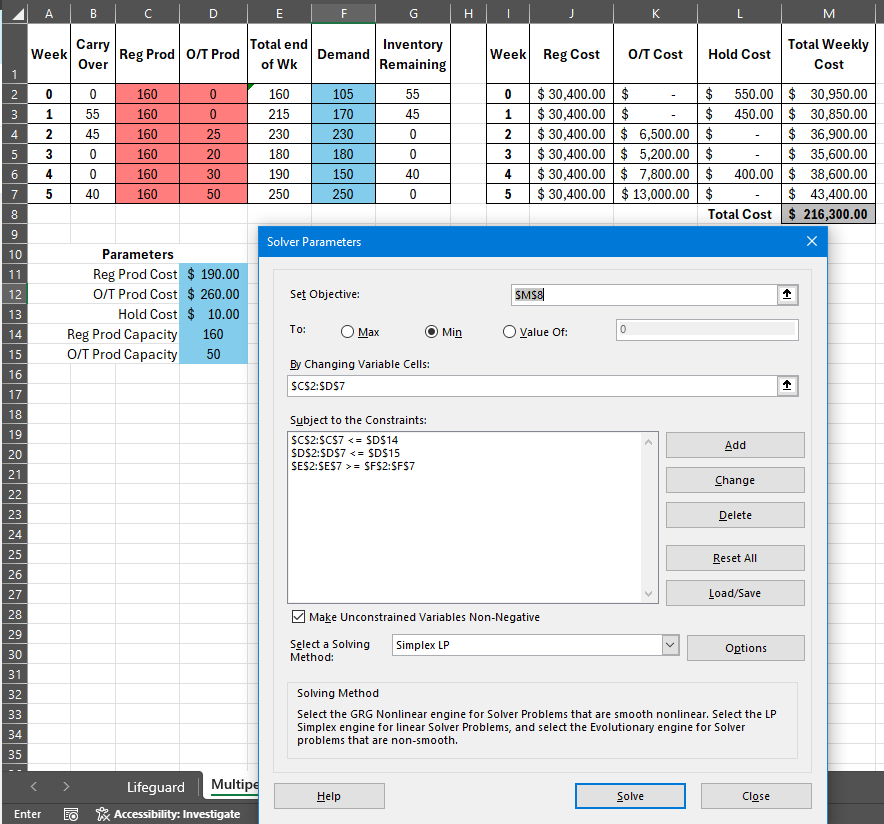

In [3]:
from IPython import display
display.Image("./M3_q2_screenshot.png")

## Python Model

**Sets** \
$W$: set of weeks \{0, 1, ..., 5\}

**Parameters** \
$d_w$: demand for week $w$ \
$c_r$: regular production cost \
$c_o$: overtime production cost \
$c_h$: holding cost \
$r$: regular production capacity \
$o$: overtime production capacity 

**Decision Variables** \
$x_w$: number of snowboards produced regularly in week $w$ \
$y_w$: number of snowboards produced overtime in week $w$ \
$h_w$: number of snowboards held in inventory at the end of week $w$ 

**Objective Function and Constraints** \
The optimization model is formulated as:

\begin{equation*}
\begin{matrix}
\underset{x, y, h}{\min} & \underset{w \in W}{\sum} (c_r x_w + c_o y_w + c_h h_w) &  &  &  \\
\textrm{s.t.} & x_w & \leq & r & \forall w \in W \\
& y_w & \leq & o & \forall w \in W \\
& h_w & = & h_{w-1} + x_w + y_w - d_w & \forall w \in W \\
& h_0 & = & 0 & \\
& x_w, y_w, h_w & \geq & 0 & \forall w \in W \\
\end{matrix}
\end{equation*}


In [4]:
from gurobipy import *
m = Model('multiperiod')

# Sets
## weeks 0-5
W = range(6)

# Parameters
## weekly demand of boards - minimum required
d = [105, 170, 230, 180, 150, 250]
## regular production cost
c_r = 190
## overtime production cost
c_o = 260
## inventory hold over from previous week cost
c_h = 10
## regular production capacity
r = 160
## overtime production capacity
o = 50

# Decision Variables
## number of boards produced regularly
x = [m.addVar(name=f'Regular_Week_{w}', lb=0, vtype=GRB.INTEGER) for w in W]
## number of boards produced in overtime
y = [m.addVar(name=f'Overtime_Week_{w}', lb=0, vtype=GRB.INTEGER) for w in W]
## number of boards in inventory to carry over between weeks
h = [m.addVar(name=f'Inventory_Week_{w}', lb=0, vtype=GRB.INTEGER) for w in W]
m.update()

# Objective Function
## Minimize overall cost over all 6 weeks
m.setObjective(quicksum(c_r*x[w]+c_o*y[w]+c_h*h[w] for w in W), GRB.MINIMIZE)
m.update()

# Constraints
## regular production capactiy
m.addConstrs(x[w] <= r for w in W)
## overtime production capacity
m.addConstrs(y[w] <= o for w in W)
## inventory meets or exceeds the demand for the week
m.addConstrs((h[w] == (h[w-1] if w > 0 else 0) + x[w] + y[w] - d[w]) for w in W)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
for var in m.getVars():
    print(f'{var.varName} = {round(var.x, 3)}')
print(f'The total cost is ${m.objval:,.0f}.')


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 18 rows, 18 columns and 35 nonzeros
Model fingerprint: 0xcefdfe17
Variable types: 0 continuous, 18 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 3e+02]
Found heuristic solution: objective 226350.00000
Presolve removed 14 rows and 8 columns
Presolve time: 0.00s
Presolved: 4 rows, 10 columns, 13 nonzeros
Variable types: 0 continuous, 10 integer (0 binary)
Found heuristic solution: objective 220510.00000

Root relaxation: objective 2.163000e+05, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumb

# Question 3
## Security Financial Planning

Security Financial specializes in making recommendations to investors who have recently come into unexpected sums of money from inheritances & lottery winnings & etc. With each client they discuss investment goals and consider each client's attitude towards risk and liquidity.

After an initial consultation with a client & a Security Financial advisor selects a group of stocks & bonds and mutual funds & savings plans & and other investments that she feels may be appropriate for consideration in the portfolio. She then secures information on each investment and determines her own rating. With this information she develops risk factors from 0 to 100. She also develops expected returns & based on current and projected company operations & and liquidity information. There is then a second meeting where the advisor defines the client's goals more specifically. The responses are entered into a linear programming model & and a recommendation is made to the client based on the results of the model.

Enter Nolan. Nolan Murray has just inherited $100 &000. Based on the initial meeting & the advisor has found Nolan to be quite risk-averse & and she suggests the following potential investments that can offer good returns with small risks.

There are a number of different investments & each with an expected return & rating & liquidity & and risk factor. See the table below. Notice here that the riskier investments also tend to have a higher return & ostensibly as a reward for taking on the associated risk.

\begin{equation*}
\begin{matrix}
& Investment & Expected Return & Rating & Liquidity & Risk Factor & \\
& Savings Account & 4\% & A & Immediate & 0 &\\
& Cert. of Deposit & 5.2\% & A & 5-year & 0 & \\
& Atlantic Lighting & 7.1\% & B+ & Immediate & 25 & \\
& Arkansas REIT & 10\% & B & Immediate & 30 & \\
& Bedrock Insurance & 8.2\% & A & 1-year & 20 & \\
& Nocal Mining Bond & 6.5\% & B+ & 1-year & 15 & \\
& Minicomp Systems & 20\% & A & Immediate & 65 & \\
& Anthony Hotels & 12.5\% & C & Immediate & 40 & \\
\end{matrix}
\end{equation*}

Let's look at Nolan’s portfolio goals. Nolan would like to minimize risk while getting an expected annual return of at least 7.5\%. At least half of the inheritance must be in A-rated investments. At least 40\% of the inheritance must be immediately liquid & and no more than $30 &000 invested in savings accounts and certificates of deposits.

**Develop a portfolio allocation that minimizes risk while meeting Nolan’s goals.**

-Formulate this problem in Jupyter Notebook.\
-Setup and solve this problem in Excel/Solver. Include a screenshot of your Excel model & along with the Solver window & in your Jupyter Notebook (and consequently your PDF report).\
-Setup and solve this problem in Python/Gurobi.\

## Excel Model

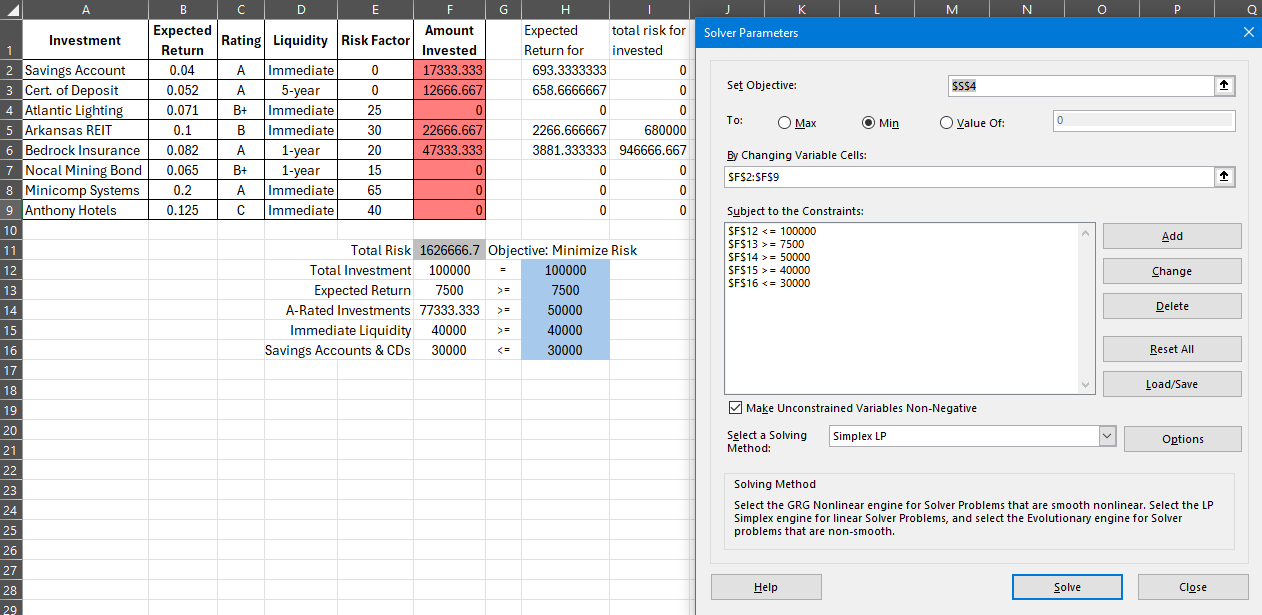

In [5]:
from IPython import display
display.Image("./M3_q3_screenshot.png")

## Python Model
**Sets** \
$I$: set of investments {0, 1, ..., 7} 

**Parameters** \
$p_i$: expected return of the investment $i$ \
$r_i$: risk factor of the investment $i$ \
$a_i$: rating of the investment $i$ \
$l_i$: liquidity of the investment $i$ \
total inheritance amount ($100,000$) \


**Decision Variables** \
$x_i$: amount invested in investment $i$ 

**Objective Function and Constraints** \
The optimization model is formulated as: 

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{i \in I}{\sum} r_i x_i & & & \\
\textrm{s.t.} & \underset{i \in I}{\sum} x_i & = & 100000 & \\
& \underset{i \in I}{\sum} p_i x_i & \geq & 7500 & \\
& \underset{i \in I \text{ where } a_i = \text{'A'}}{\sum} x_i & \geq & 50000 & \\
& \underset{i \in I \text{ where } l_i = \text{'Immediate'}}{\sum} x_i & \geq & 40000 & \\
& x_0 + x_1 & \leq & 30000 & \\
& x_i & \geq & 0 & \forall i \in I \\
\end{matrix}
\end{equation*}

In [6]:
from gurobipy import *

# Create a new model
m = Model('securityfinancial')

# Sets and parameters
I = ['Savings Account', 'Cert. of Deposit', 'Atlantic Lighting', 'Arkansas REIT',
     'Bedrock Insurance', 'Nocal Mining Bond', 'Minicomp Systems', 'Anthony Hotels']
p = [0.04, 0.052, 0.071, 0.10, 0.082, 0.065, 0.20, 0.125]
r = ['A', 'A', 'B+', 'B', 'A', 'B+', 'A', 'C']
l = ['Immediate', '5-year', 'Immediate', 'Immediate', '1-year', '1-year', 'Immediate', 'Immediate']
rf = [0, 0, 25, 30, 20, 15, 65, 40]
ti = 100000

# Decision variables
## Amount to invest in each investment
x = [m.addVar(name=I[i], lb=0) for i in range(len(I))]
m.update()

# Objective function
## Minimize total risk
m.setObjective(quicksum(rf[i]*x[i] for i in range(len(I))), GRB.MINIMIZE)
m.update()

# Constraints
## total investment = inheritance
m.addConstr(quicksum(x[i] for i in range(len(I))) == ti, "TotalInvestment")
## expected return >= 7.5%
m.addConstr(quicksum(p[i] * x[i] for i in range(len(I))) >= 0.075 * ti, "ExpectedReturn")
## "A" rated investments >= 50000
m.addConstr(quicksum(x[i] for i in range(len(I)) if r[i] == 'A') >= 0.5 * ti, "ARatedInvestment")
## immediate investments >=40000
m.addConstr(quicksum(x[i] for i in range(len(I)) if l[i] == 'Immediate') >= 0.4 * ti, "ImmediateLiquidity")
## savings accounts and certificates of deposits <= 30000
m.addConstr(x[0] + x[1] <= 30000, "SavingsAndCDs")

# Solve and print the solution
m.optimize()
print("\n\n")
print("\nOptimal Investment Plan:")
for var in m.getVars():
    print(f'{var.varName} = ${var.x:,.2f}')
print(f"\nTotal Risk: {m.objVal:.2f}")


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 8 columns and 27 nonzeros
Model fingerprint: 0xf17ddf98
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+05]
Presolve time: 0.00s
Presolved: 5 rows, 8 columns, 27 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.192000e+05   0.000000e+00      0s
       7    1.6266667e+06   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.626666667e+06




Optimal Investment Plan:
Savings Account = $17,333.33
Cert. of Deposit = $12,666.67
Atlantic Lighting = $0.00
Arkansas REIT = $22,666.67
Bedrock Insurance =